# College Graduate Employment Analysis

In this project I analyze and visualize a dataset that ranks college graduate majors. Scatter plots, histograms, bin plots and bar plots are used to explore potential correlations with the median salaries for each major. Dataset is released by the American Community Survery and can be found [here](https://github.com/fivethirtyeight/data/tree/master/college-majors)

In [1]:
#import data and run matplotplot inline
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#explore data
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [2]:
#clean data- drop rows with missing values
raw_data_count = len(recent_grads)
print(raw_data_count)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

173
172


# Scatter Plot and  Histogram Analysis

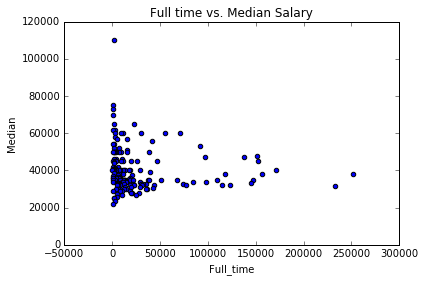

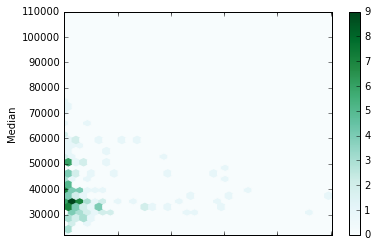

In [13]:
#IS THERE ANY LINK BETWEEN THE NUMBER OF FULL-TIME EMPLOYEES AND MEDIAN SALARY?
#scatter for full time and median
ax3 = recent_grads.plot(x='Full_time',y='Median',kind='scatter')
ax3.set_title('Full time vs. Median Salary')
plt.show()
recent_grads.plot.hexbin(x='Full_time',y='Median',gridsize=35);

# Findings- Is there any link between the number of full-time employees and median salary?

It does not look like there is any significant link between the number of full-time employees and median salary. There are some higher salary values at majors with few full-time employees but there are also a lot of lower salary values. It is likely there are better explanatory variables. 

In [ ]:
#DO STUDENTS THAT MAJORED IN LARGELY FEMALE-ATTENDED SUBJECTS MAKE LESS MONEY?
#scatter for % share women and unemployment rate
ax4 = recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter')
ax4.set_title('% Share Women vs. Unemployment rate')

In [ ]:
#scatter for share women and median
ax5 = recent_grads.plot(x='ShareWomen',y='Median',kind='scatter')
ax5.set_title('% Share Women vs. Median Salary')
#scattermatrix for further insight
scatter_matrix(recent_grads[['ShareWomen','Median']],figsize=(10,10));

# Findings- Do students that majored in largely female-attended subjects make less money?

The unemployment comparison does not bring us much insight as the points are widely scattered with no significant pattern. However, the scatter plot median salary comparison shows students in largely female-attended subjects do make less money. The histogram also appears to show that there is a higher share of females in most classes. 

In [ ]:
#DO STUDENTS IN MORE POPULAR MAJORS MAKE MORE MONEY?
#scatter for men and median
ax6 = recent_grads.plot(x='Men',y='Median',kind='scatter')
ax6.set_title('Male attendance vs. Median Salary')
scatter_matrix(recent_grads[['Men','Median']],figsize=(10,10));

In [ ]:
#scatter for women and median
ax6 = recent_grads.plot(x='Women',y='Median',kind='scatter')
ax6.set_title('Female attendance vs. Median Salary')
scatter_matrix(recent_grads[['Women','Median']],figsize=(10,10));

# Findings- Do students in less popular majors make more money?

The scatter plot shows that the majors with the highest median salaries are also some of the least popular majors. With that said, the histogram also shows that a very large portion of all majors are less popular, with 50,000 graduates or less, compared to the biggest major which has over 300,000 graduates. Consequentially, this does not mean that all of the least popular majors have high salaries, in fact some of them are very low. For example, students in low popularity majors such as engineering have higher salaries, but students in low popularity majors like library science have very low salaries. Median salaries likely also depend on other factors such as content difficulty and market demand, ie those with a more difficult and marketable skillset will be in higher demand and receive a higher salary. 

In [ ]:
#WHAT IS THE MOST COMMON MEDIAN SALARY RANGE?
#full view histogram for median, intervals of $5000
recent_grads['Median'].hist(bins=24,range=(0,120000))

In [ ]:
#zoom in to the high density area, intervals of $1000
recent_grads['Median'].hist(bins=30,range=(25000,55000))

# Findings- What is the most common salary range?

At the 5k salary interval, 30-35k is the most common range, with 35-40k being the second most common. However, if we zoom into 1k intervals on these ranges we find that 35-36k is the most common salary range, with 40-41k being the second most common. This is interesting considering neither of these values are within the original interval of 30-35k. The reason for this is that the 30-35k range has a more even distribution of salaries whereas the 35k+ range does not. Also notice both 35-36k and 40-41k show salaries that are just above psychological price points, ie 35k and 40k, which likely explains why they're so common. 

In [ ]:
#WHAT PERCENT OF MAJORS ARE PREDOMINATELY MALE? FEMALE?
#histogram for % share women, intervals of 0.05 or 5%
recent_grads['ShareWomen'].hist(bins=20,range=(0,1))

In [ ]:
#create frequency tables and convert to pct
num_female = 0 
num_male = 0
for row in recent_grads['ShareWomen']:
    if row > .5:
        num_female += 1
    elif row < .5:
        num_male += 1
        
pct_female_majors = num_female / len(recent_grads['ShareWomen'])
pct_male_majors = num_male / len(recent_grads['ShareWomen'])
print('Percentage predominately female majors:',pct_female_majors)
print('Percentage predominately male majors:',pct_male_majors)

# Findings- What percent of Majors are predominately male? Female?

From our histogram it appears that there are slightly more majors that are predominately female than there are male. After running our frequency table we find that this is true. 55.8% of all majors are predominately female, and 44.2% are predominately male. 

# Bar Plots

In [ ]:
#first and last 10 rows of % share women
bar1 = recent_grads[:10]['ShareWomen'].plot(kind='bar')
plt.show()
bar2 = recent_grads[-10:]['ShareWomen'].plot(kind='bar')

In [ ]:
#first and last 10 rows of unemployment rate
ax1 = recent_grads[:10]['Unemployment_rate'].plot(kind='bar')
plt.show()
ax2 = recent_grads[-10:]['Unemployment_rate'].plot(kind='bar')

# Bar Plot findings

The last 10 ranked majors have a way higher percent share of females than the first 10, as the first are between 10% and 60% and the last are all around 80%.

The unemployment rate is pretty similar between the first and last rows, with the first rows being a little lower on average. The other notable difference is that the variance of the first rows is higher, ranging from 2% to 18%, while the last rows only ranged from 4% to around 15%.